## Estudo Dirigido: Roubos e Furtos de veículos no estado de São Paulo em 2016/2017

#### Autor: Ramon de Carvalho Nogueira 
#### LinkedIn: https://www.linkedin.com/in/ramonrcn/
#### E-Mail: ramon_rcn@hotmail.com
#### Data de início: 14/02/2018
#### Dados públicos obtidos em http://www.ssp.sp.gov.br/transparenciassp/

### Este estudo tem como objetivos
    Exibir de forma objetiva e rápida os dados coletados pela SSP.
    Responder as seguintes questões:
        - Quais os veículos mais visados?
        - Quais os veículos menos visados?
        - Total de ocorrências para cada modelo.
        - Total de ocorrências por localidade.
        - Cidades com o maior número de ocorrências.
        - Quais as regiões com maior índice de ocorrências?
        - Verificar mês a mês o número de Furtos x Roubos para carros e motos

### Além de satifazer algumas curiosidades pessoais
    - Existe uma cor 'preferida' pelos bandidos na hora de levar seu carro?
    - São carros mais novos ou mais velhos?
    Entre outras que irão surgindo durante o processo e que serão destacadas durante o Notebook.
    
### Será dividido em partes
    Afim de facilitar o entendimento, o estudo será dividido em partes:
        Tratamento dos dados de Furtos de 2016
        Tratamento dos dados de Roubos de 2016
        Tratamento dos dados de Furtos de 2017
        Tratamento dos dados de Roubos de 2017
        Geração de Valor a partir dos dados tratados para roubos e furtos no período 2016/2017
           

# Tratando dos furtos de 2016

Mas antes, vamos deixar claro o que é um Furto e o que é um Roubo.

#### Furto:
    O furto é caracterizado pela tomada de um bem material, sem que haja violência ou ameaça contra a vítima
    Lei: Art. 155.
    Vítima: Não está presente, ou não percebe a ação.

#### Roubo:
    O roubo consiste em um ato de subtrair um bem material de outrem por meio de violência ou ameaça.
    Lei: Art. 157.
    Vítima: A pessoa está presente, e sofre ameaça ou é alvo de violência. 
Fonte: https://www.diferenca.com/furto-e-roubo/

In [1]:
#Import das bibliotecas

import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
%matplotlib inline


Fiz um pré tratamento do dataset antes de manipular seus dados. Consolidei os dados de furtos de 2016 em um unico arquivo.
O dataset ainda está cheio de 'buracos' e registros vazios, o que deve ser tratado de acordo com o objetivo desejado.

In [2]:
path = r'C:\Python\Data Science Projects\Roubos e Furtos Veículos\3 - Dados Consolidados\Furtos_2016.txt'
Furtos2016 = pd.read_csv(path, engine='python', sep='\t', parse_dates=["BO_INICIADO", "BO_EMITIDO", "DATAOCORRENCIA", "DATACOMUNICACAO", "DATAELABORACAO"])

#Retirando a coluna ID que utilizei para montar o consolidado dos furtos de 2016
Furtos2016.drop('ID', axis = 1, inplace = True)
Furtos2016.head(5)

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de objeto,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de objeto,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009.0,2009.0,AUTOMOVEL
2,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de objeto,Consumado,EYO5878,SP,PRAIA GRANDE,Cinza,VW/FOX 1.6 GII,2011.0,2012.0,AUTOMOVEL
3,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de veículo,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de veículo,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009.0,2009.0,AUTOMOVEL


## Análise de anomalias
    Explorando, conhecendo, filtrando e removendo valores inválidos nos campos chave

In [3]:
Furtos2016.describe(include=['object'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,158654,158654,158654,141651,129159,141651,141651,141549,141549,158654,...,158654,158654,158654,158654,134598,135253,135117,135255,134701,134701
unique,5,3,2,44552,10951,543,1,89691,89708,29,...,958,28,184,2,116724,27,1418,16,3920,23
top,A NOITE,Desconhecida,Não,AVENIDA BRASIL,CENTRO,S.PAULO,SP,"-228,711,916,309,999","-471,995,525,679,999",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,Consumado,XXX0000,SP,S.PAULO,Preta,FIAT/UNO ELETRONIC,AUTOMOVEL
freq,42061,138184,148884,315,8860,54784,141651,218,218,101262,...,1765,137255,125096,158476,36,130714,46338,29106,2181,87801


#### Pontos a serem considerados:
  
    Placa XXX-0000 -> Não existe no Sinesp, logo é inválida.
    Carro mais furtado: Fiat Uno Eletronic, preto. (/ironia)    




In [4]:
#Vendo os registros com a placa XXX000

for y, x in Furtos2016.iterrows():
    if x.PLACA_VEICULO == 'XXX0000':
        print(y, x.DATAOCORRENCIA,' ',x.DELEGACIA_NOME,' ',x.PLACA_VEICULO,' ',x.UF_VEICULO,' ',
              x.CIDADE_VEICULO,' ',x.DESCR_TIPO_VEICULO,' ',x.DESCR_MARCA_VEICULO )


2566 2016-11-29 00:00:00   37º D.P. CAMPO LIMPO   XXX0000   SP   S.PAULO   AUTOMOVEL   IMP/VW GOL CLI
2568 2016-11-29 00:00:00   37º D.P. CAMPO LIMPO   XXX0000   SP   S.PAULO   AUTOMOVEL   IMP/VW GOL CLI
2570 2016-11-29 00:00:00   37º D.P. CAMPO LIMPO   XXX0000   SP   S.PAULO   AUTOMOVEL   IMP/VW GOL CLI
17831 2016-11-20 00:00:00   DEL.POL.PLANTÃO JABOTICABAL   XXX0000   SP   S.PAULO   TRATOR RODAS   M.A./CASE
19861 2016-06-15 00:00:00   DEL.POL.ARARAS   XXX0000   SP   ARARAS   TRATOR RODAS   M.A./MASSEY-FERGUSON
32021 2016-09-15 00:00:00   DEL.SEC.RIO CLARO PLANTÃO   XXX0000   SP   S.PAULO   AUTOMOVEL   CITROEN/C3 XTR 16 FLEX
32024 2016-09-15 00:00:00   DEL.SEC.RIO CLARO PLANTÃO   XXX0000   SP   S.PAULO   AUTOMOVEL   CITROEN/C3 XTR 16 FLEX
32027 2016-09-15 00:00:00   DEL.SEC.RIO CLARO PLANTÃO   XXX0000   SP   S.PAULO   AUTOMOVEL   CITROEN/C3 XTR 16 FLEX
33967 2016-05-29 00:00:00   02º D.P. SANTO ANDRÉ   XXX0000   SP   S.PAULO   INEXIST.   MO/JCB 214E
34864 2016-06-21 00:00:00   14º D.

    "7º D.P. CAMPO LIMPO   XXX0000   SP   S.PAULO   AUTOMOVEL   IMP/VW GOL CLI":
    Melhor dropar esses Gols Argentinos e as máquinas agrícolas kkk (zuera, melhor olhar com mais calma)

### As placas.
    Normalmente, todos os veículos possuem placas. Exceto no período em que são comprados 0km.
    E tratando-se de Furtos, deve-se levar em consideração também possibilidades de furtos a lojas e concessionárias.
    
    Aqui o caminho se divide em 2, pois podemos:
    
    Apagar os registros e focar apenas nos furtos de veículos já emplacados.
    OU
    Levar em consideração os furtos de veículos ainda não emplacados, utilizando mais filtros e analisando cada bloco de informação com maior cautela.
    
    Pra esse estudo, prefiro descartar os veículos sem placa.

In [5]:
#Verificando os valores que mais aparecem 

Furtos2016['PLACA_VEICULO'].value_counts().head()

XXX0000    36
*******    14
0          13
EBU0034    11
DPQ5472    11
Name: PLACA_VEICULO, dtype: int64

In [6]:
#Deleção dos registros com placas que não atenderam ao critério

data=[]

for i, l in Furtos2016.iterrows():
    if l.PLACA_VEICULO == 'XXX0000':
        data.append(i)
    elif l.PLACA_VEICULO == '*******':
        data.append(i)
    elif l.PLACA_VEICULO == '0':
        data.append(i)

Furtos2016.drop(data, axis=0, inplace=True)

Furtos2016['PLACA_VEICULO'].value_counts().head()

BNJ4777    11
DUW1113    11
EBU0034    11
DPQ5472    11
NBF0155    10
Name: PLACA_VEICULO, dtype: int64

In [7]:
#Existem registros de veiculos com o campo da placa em branco?
Furtos2016['PLACA_VEICULO'].isnull().value_counts()

False    134535
True      24056
Name: PLACA_VEICULO, dtype: int64

In [8]:
#Dropando todos os registros com placa em branco
Furtos2016.dropna(subset=['PLACA_VEICULO'], axis=0, inplace=True)
Furtos2016['PLACA_VEICULO'].isnull().value_counts()

False    134535
Name: PLACA_VEICULO, dtype: int64

In [9]:
#Após análise do arquivo, notei que os valores da coluna BO_INICIADO são os mesmos da coluna DATAELABORACAO
Furtos2016.drop('DATAELABORACAO', axis=1, inplace=True)

#### Aplicando Filtros.
    Analisando o arquivo no Excel, entendi o porquê de tantos registros em duplicidade, principalmente na coluna 'PLACA_VEICULO'
    
    No exemplo abaixo, os registros selecionados mostram o Furto do veículo e a localização do mesmo.
    Logo, é normal do dataset registros em duplicidade, e a filtragem pela placa do veículo não é eficaz.
    
    Portanto, irei tratar as informações tendo como base as colunas 'ESPECIE' e 'RUBRICA', o que irá possibilitar manipular com maior precisão as informações do dataset

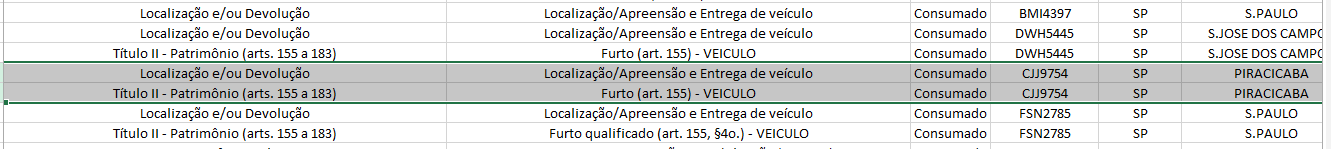

In [10]:
#Observando as 'espécies' de crimes
Furtos2016['ESPECIE'].value_counts().head(10)

Título II - Patrimônio (arts. 155 a 183)                 123120
Localização e/ou Devolução                                 8115
Ato infracional                                            1900
L 9503/97 - Código de Trânsito Brasileiro                   224
L 8069/90 - ECA                                             199
Título I - Pessoa (arts. 121 a 154)                         142
Acidente de trânsito                                        137
Título X - Fé pública (arts. 289 a 311)                     112
Título XI - Administração pública (arts. 312 a 359-H)       108
Título IX - Paz pública (arts. 286 a 288)                    97
Name: ESPECIE, dtype: int64

In [11]:
#Verificando se existe registro com a coluna ESPECIE vazia, para então poder utiliza-la como filtro
Furtos2016['ESPECIE'].isnull().value_counts()

False    134535
Name: ESPECIE, dtype: int64

##### Separando em um novo DF todos os veículos Localizados e/ou Devolvidos em 2016

In [12]:
#Utilizando a notação 'List Comprehention' para selecionar apenas os registros com 'Localização e/ou Devolução'
Furtolocdev2016 = Furtos2016[(Furtos2016.ESPECIE == 'Localização e/ou Devolução')]

Furtolocdev2016.head() 

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009.0,2009.0,AUTOMOVEL
2,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EYO5878,SP,PRAIA GRANDE,Cinza,VW/FOX 1.6 GII,2011.0,2012.0,AUTOMOVEL
4,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de veículo,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009.0,2009.0,AUTOMOVEL
5,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de veículo,Consumado,EYO5878,SP,PRAIA GRANDE,Cinza,VW/FOX 1.6 GII,2011.0,2012.0,AUTOMOVEL
21,2016,376,2016-05-27 10:09:43,2016-05-27 11:57:56,2016-05-27,PELA MANHÃ,2016-05-27,Desconhecida,Não,VICINAL CAFELANDIA/VILA BELEM,...,Localização/Apreensão de veículo,Consumado,DHF6008,SP,CAFELANDIA,Azul,VW/GOLF GENERATION,2002.0,2003.0,AUTOMOVEL


In [13]:
#Checando por registros duplicados filtrando pela placa do veículo
Furtolocdev2016['PLACA_VEICULO'].value_counts().head()

FJU8883    6
CAW2048    4
FRP5769    4
BLV3512    4
FLL0902    4
Name: PLACA_VEICULO, dtype: int64

In [14]:
#Limpando os registros duplicados filtrando pela placa
Furtolocdev2016.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)
Furtolocdev2016['PLACA_VEICULO'].value_counts().head()


C:\Users\Ramon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LWH2844    1
BQZ4767    1
EPZ5534    1
DBE9397    1
BRR4508    1
Name: PLACA_VEICULO, dtype: int64

In [15]:
#Salvando os registros de veículos localizados e devolvidos para análise à parte em outro notebook
Furtolocdev2016.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\4 - Análises\Furtolocdev2016.csv')

 Com os veículos Localizados e/ou Devolvidos armazenados em um set à parte, irei assumir cada placa como única no Dataset principal
    

In [16]:
#Deletando todas as placas com valores duplicados
Furtos2016.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)

In [17]:
Furtos2016.describe(include=['O'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,116721,116721,116721,105983,95823,105983,105983,105953,105953,116721,...,116721,116721,116721,116721,116721,116720,116585,116721,116197,116197
unique,5,3,2,43033,10595,540,1,84686,84689,29,...,955,22,114,2,116721,27,1414,16,3836,20
top,A NOITE,Desconhecida,Não,AVENIDA BRASIL,CENTRO,S.PAULO,SP,"-232,144,468,931,052","-468,457,230,086,009",Via pública,...,14º D.P. PINHEIROS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,Consumado,EDX3758,SP,S.PAULO,Preta,FIAT/UNO ELETRONIC,AUTOMOVEL
freq,31013,111900,114847,217,7062,42465,105983,103,103,73112,...,1276,109264,104361,116704,1,112848,40549,25403,1818,76668


###### Agora, tratando os valores em branco

In [18]:
#Identificando todos os campos em branco
branco = Furtos2016.isnull()
branco.head(5)

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
#Exibindo coluna a coluna os registros em branco
for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print("")


ANO_BO
False    95223
Name: ANO_BO, dtype: int64

NUM_BO
False    95223
Name: NUM_BO, dtype: int64

BO_INICIADO
False    95223
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    95223
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    95223
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    95223
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    95223
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    95223
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    95223
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    95223
Name: LOGRADOURO, dtype: int64

NUMERO
False    95223
Name: NUMERO, dtype: int64

BAIRRO
False    95223
Name: BAIRRO, dtype: int64

CIDADE
False    95223
Name: CIDADE, dtype: int64

UF
False    95223
Name: UF, dtype: int64

LATITUDE
False    95223
Name: LATITUDE, dtype: int64

LONGITUDE
False    95223
Name: LONGITUDE, dtype: int64

DESCRICAOLOCAL
False    95223
Name: DESCRICAOLOCAL, dtype: int64

EXAME
True     91236
False     3987
Na

In [29]:
#Deletando registros em branco de algumas colunas
Furtos2016.dropna(subset = ['LATITUDE','BAIRRO','UF_VEICULO','CIDADE_VEICULO','ANO_FABRICACAO',
                            'UF','DESCR_MARCA_VEICULO','ANO_MODELO'], axis = 0, inplace = True)


In [30]:
#Novo panorama de valores em branco
branco = Furtos2016.isnull()

for coluna in branco.columns.values.tolist():
    print(coluna)
    print(branco[coluna].value_counts())
    print('')

ANO_BO
False    95223
Name: ANO_BO, dtype: int64

NUM_BO
False    95223
Name: NUM_BO, dtype: int64

BO_INICIADO
False    95223
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    95223
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    95223
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    95223
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    95223
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    95223
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    95223
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    95223
Name: LOGRADOURO, dtype: int64

NUMERO
False    95223
Name: NUMERO, dtype: int64

BAIRRO
False    95223
Name: BAIRRO, dtype: int64

CIDADE
False    95223
Name: CIDADE, dtype: int64

UF
False    95223
Name: UF, dtype: int64

LATITUDE
False    95223
Name: LATITUDE, dtype: int64

LONGITUDE
False    95223
Name: LONGITUDE, dtype: int64

DESCRICAOLOCAL
False    95223
Name: DESCRICAOLOCAL, dtype: int64

EXAME
True     91236
False     3987
Na

In [31]:
#Tipando as colunas como inteiro
Furtos2016['ANO_MODELO'] = Furtos2016.ANO_MODELO.astype(int)
Furtos2016['ANO_FABRICACAO'] = Furtos2016.ANO_FABRICACAO.astype(int)
Furtos2016['NUMERO'] = Furtos2016.NUMERO.astype(int)
Furtos2016.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009,2009,AUTOMOVEL
2,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EYO5878,SP,PRAIA GRANDE,Cinza,VW/FOX 1.6 GII,2011,2012,AUTOMOVEL
9,2016,670209,2016-05-27 11:26:36,2016-05-27 11:26:36,2016-05-26,PELA MANHÃ,2016-05-27,Desconhecida,Não,RUA BENTO RODRIGUES DA SILVA,...,Furto (art. 155) - VEICULO,Consumado,BNO7895,SP,S.ANDRE,Verde,FIAT/UNO ELETRONIC,1993,1993,AUTOMOVEL
10,2016,2027,2016-05-27 11:19:03,2016-05-27 11:27:58,2016-05-27,DE MADRUGADA,2016-05-27,Desconhecida,Não,ALAMEDA RIBEIRAO PRETO,...,Furto (art. 155) - VEICULO,Consumado,FJJ9789,SP,S.PAULO,Branco,CHEVROLET/CELTA 1.0L LT,2014,2015,AUTOMOVEL
11,2016,1432,2016-05-27 11:29:21,2016-05-27 11:37:55,2016-12-05,A NOITE,2016-05-27,Desconhecida,Não,RUA VINTE E TRES DE SETEMBRO,...,Furto (art. 155) - VEICULO,Consumado,CDG6640,SP,S.PAULO,Cinza,FORD/ESCORT GHIA,1988,1988,AUTOMOVEL


In [32]:
#Salvando o DF como .csv para uma análise mais detalhada
Furtos2016.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Furtos2016_v1.csv')

# Tratando dos Furtos de 2017

In [33]:
path = r'C:\Python\Data Science Projects\Roubos e Furtos Veículos\3 - Dados Consolidados\Furtos_2017.txt'
Furtos2017 = pd.read_csv(path, engine='python', sep='\t', parse_dates=["BO_INICIADO", "BO_EMITIDO", "DATAOCORRENCIA", "DATACOMUNICACAO", "DATAELABORACAO"])

#Retirando a coluna ID que utilizei para montar o consolidado dos furtos de 2017 e a coluna DATAELABORACAO
Furtos2017.drop(['ID','DATAELABORACAO'], axis=1, inplace=True)
Furtos2017.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2017,2154,2017-03-13 22:40:00,2017-03-13 22:45:42,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,RUA JÚLIO SOARES MOTA,...,Furto (art. 155) - VEICULO,Consumado,BMU6966,SP,CAMPINAS,Azul,FORD/ESCORT 1.6I GLX,1995.0,1995.0,AUTOMOVEL
1,2017,1161,2017-03-13 22:44:17,2017-03-13 22:49:38,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,RUA MANOEL DIAS MARCELINO,...,Furto (art. 155) - VEICULO,Consumado,DCS5165,SP,SANTOS,Verde,HONDA/C100 BIZ ES,2001.0,2001.0,MOTONETA
2,2017,363149,2017-03-13 22:50:08,2017-03-13 22:50:08,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,R. ALEGRE,...,Furto (art. 155) - VEICULO,Consumado,EVK6745,SP,S.CAETANO DO SUL,Cinza,I/CHEVROLET AGILE LTZ,2010.0,2010.0,AUTOMOVEL
3,2017,620,2017-03-13 22:53:10,2017-03-13 22:57:12,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,RUA OLÍMPIO CATÃO,...,Furto (art. 155) - VEICULO,Consumado,DDJ4662,SP,JACAREI,Branco,FIAT/FIORINO IE,2000.0,2001.0,CAMINHONETE
4,2017,1541,2017-03-13 22:37:33,2017-03-13 22:57:52,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,AVENIDA ANTONIA PIZZINATO STURION,...,Furto (art. 155) - VEICULO,Consumado,EZT1618,SP,PIRACICABA,Preta,VW/GOL 1.6,2012.0,2012.0,AUTOMOVEL


### Análize preliminar dos dados

In [34]:
Furtos2017.describe(include=['O'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,147108,147108,147108,132056,121409,132056,132056,131944,131944,147108,...,147108,147108,147108,147108,121876,122371,122220,122371,122002,122002
unique,5,3,2,42107,9767,543,1,84338,84349,30,...,964,27,176,2,105764,29,1412,16,3919,22
top,PELA MANHÃ,Desconhecida,Não,AVENIDA BRASIL,CENTRO,S.PAULO,SP,"-22,761,094,185,692","-471,562,524,543,034",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,Consumado,XXX0000,SP,S.PAULO,Preta,GM/CORSA WIND,AUTOMOVEL
freq,40662,127782,137119,260,7980,52438,132056,137,137,94321,...,1553,127560,115461,146918,33,117826,43578,26912,1832,80564


#### Pontos a serem considerados:
    Placas -> XXX0000
    Carro mais furtado em 2017: Corsa wind preto (/ironia)


In [35]:
#Verificando se existe mais algum registro 'coringa'
Furtos2017['PLACA_VEICULO'].value_counts().head()

XXX0000    33
DDW0111    16
FNL5628    16
FJT8929    16
FTI5956    16
Name: PLACA_VEICULO, dtype: int64

In [37]:
#Deleção dos registros com placas que não atenderam ao critério

data=[]

for i, l in Furtos2017.iterrows():
    if l.PLACA_VEICULO == 'XXX0000':
        data.append(i)
    
Furtos2017.drop(data, axis=0, inplace=True)

Furtos2016['PLACA_VEICULO'].value_counts().head()

CNL5171    1
CGS1959    1
FGZ3754    1
BJU7750    1
FHP9748    1
Name: PLACA_VEICULO, dtype: int64

In [38]:
Furtos2017['PLACA_VEICULO'].isnull().value_counts()

False    121843
True      25232
Name: PLACA_VEICULO, dtype: int64

In [39]:
Furtos2017.dropna(subset=['PLACA_VEICULO'], axis=0, inplace=True)
Furtos2017['PLACA_VEICULO'].isnull().value_counts()

False    121843
Name: PLACA_VEICULO, dtype: int64

In [40]:
#Filtrando os veículos encontrados e/ou devolvidos

Furtolocdev2017 = Furtos2017[Furtos2017.ESPECIE == 'Localização e/ou Devolução']
Furtolocdev2017.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
45,2017,2790,2017-03-13 20:51:57,2017-03-14 01:06:53,2017-03-13,A TARDE,2017-03-13,Conhecida,Sim,RUA PALMARES,...,Localização/Apreensão e Entrega de veículo,Consumado,BIF4675,SP,ITAPIRA,Bege,VW/GOL GL,1988.0,1988.0,AUTOMOVEL
53,2017,1962,2017-03-14 01:15:09,2017-03-14 01:20:11,2017-03-13,PELA MANHÃ,2017-03-14,Desconhecida,Não,RUA CAPITAO FONSECA ROSA,...,Localização/Apreensão e Entrega de veículo,Consumado,EMJ5490,SP,S.PAULO,Vermelho,VW/NOVO GOL 1.6 RALLYE,2013.0,2014.0,AUTOMOVEL
61,2017,2797,2017-03-14 02:12:02,2017-03-14 02:13:06,2017-03-13,A TARDE,2017-03-14,Conhecida,Sim,RUA PALMARES,...,Localização/Apreensão e Entrega de veículo,Consumado,BIF4675,SP,ITAPIRA,Bege,VW/GOL GL,1988.0,1988.0,AUTOMOVEL
85,2017,850,2017-03-14 06:02:17,2017-03-14 07:49:06,2017-03-14,DE MADRUGADA,2017-03-14,Conhecida,Não,RUA JANDIRA DE LIMA CAMARGO,...,Localização/Apreensão e Entrega de veículo,Consumado,CYA4327,SP,MAIRIPORA,Azul,FIAT/UNO MILLE SMART,2000.0,2001.0,AUTOMOVEL
104,2017,4531,2017-11-27 20:37:19,2017-11-28 06:29:05,2017-11-27,A TARDE,2017-11-27,Conhecida,Sim,AVENIDA DEPUTADO CASTRO DE CARVALHO,...,Localização/Apreensão e Entrega de veículo,Consumado,CFG6942,SP,POA,Vermelho,FIAT/UNO MILLE IE,1996.0,1996.0,AUTOMOVEL


In [41]:
#Verificando placas repetidas para os veículos localizados/devolvidos
Furtolocdev2017['PLACA_VEICULO'].value_counts().head()

FNL5628    6
FJT8929    6
FTI5956    6
DDW0111    6
ELG3662    6
Name: PLACA_VEICULO, dtype: int64

In [42]:
#Deletando todos os registros onde a placa do veículo aparece mais de uma vez
Furtolocdev2017.drop_duplicates(['PLACA_VEICULO'], keep = 'first', inplace = True)
Furtolocdev2017['PLACA_VEICULO'].value_counts().head()

C:\Users\Ramon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


FFS7042    1
FIS6130    1
FGR4639    1
DLJ6211    1
DYM0858    1
Name: PLACA_VEICULO, dtype: int64

In [43]:
#Salvando os registros de veículos localizados e devolvidos para análise à parte em outro notebook
Furtolocdev2017.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\4 - Análises\Furtolocdev2017.csv')

In [45]:
#Verificando se existem placas em branco no dataset principal
Furtos2017['PLACA_VEICULO'].isnull().value_counts().head()

False    121843
Name: PLACA_VEICULO, dtype: int64

In [46]:
#Verificando se existem placas duplicadas
Furtos2017['PLACA_VEICULO'].value_counts().head()

FJT8929    16
FNL5628    16
ELG3662    16
FTI5956    16
DDW0111    16
Name: PLACA_VEICULO, dtype: int64

In [48]:
#Deletando as placas duplicadas
Furtos2017.drop_duplicates(subset = ['PLACA_VEICULO'], keep = 'first', inplace = True)
Furtos2017['PLACA_VEICULO'].value_counts().head()

PVY1586    1
EQA3776    1
BIT5060    1
DYU1412    1
EXB9265    1
Name: PLACA_VEICULO, dtype: int64

In [49]:
#Identificando todos os campos em branco
branco = Furtos2017.isnull()
branco.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
#Exibindo coluna a coluna os registros em branco
for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print('')


ANO_BO
False    105763
Name: ANO_BO, dtype: int64

NUM_BO
False    105763
Name: NUM_BO, dtype: int64

BO_INICIADO
False    105763
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    105763
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    105763
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    105763
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    105763
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    105763
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    105763
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    96229
True      9534
Name: LOGRADOURO, dtype: int64

NUMERO
False    105761
True          2
Name: NUMERO, dtype: int64

BAIRRO
False    88235
True     17528
Name: BAIRRO, dtype: int64

CIDADE
False    96229
True      9534
Name: CIDADE, dtype: int64

UF
False    96229
True      9534
Name: UF, dtype: int64

LATITUDE
False    96189
True      9574
Name: LATITUDE, dtype: int64

LONGITUDE
False    96189
True      9574
Name: LONGITUDE, dt

In [51]:
#Deletando registros em branco de algumas colunas
Furtos2017.dropna(subset = ['LATITUDE','BAIRRO','UF_VEICULO','CIDADE_VEICULO','ANO_FABRICACAO',
                            'UF','DESCR_MARCA_VEICULO','ANO_MODELO'], axis = 0, inplace = True)


In [52]:
#Novo panorama de valores em branco
branco = Furtos2017.isnull()

for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print('')


ANO_BO
False    87803
Name: ANO_BO, dtype: int64

NUM_BO
False    87803
Name: NUM_BO, dtype: int64

BO_INICIADO
False    87803
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    87803
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    87803
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    87803
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    87803
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    87803
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    87803
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    87803
Name: LOGRADOURO, dtype: int64

NUMERO
False    87803
Name: NUMERO, dtype: int64

BAIRRO
False    87803
Name: BAIRRO, dtype: int64

CIDADE
False    87803
Name: CIDADE, dtype: int64

UF
False    87803
Name: UF, dtype: int64

LATITUDE
False    87803
Name: LATITUDE, dtype: int64

LONGITUDE
False    87803
Name: LONGITUDE, dtype: int64

DESCRICAOLOCAL
False    87803
Name: DESCRICAOLOCAL, dtype: int64

EXAME
True     83898
False     3905
Na

In [53]:
#Tipando as colunas como inteiro
Furtos2017['ANO_MODELO'] = Furtos2017.ANO_MODELO.astype(int)
Furtos2017['ANO_FABRICACAO'] = Furtos2017.ANO_FABRICACAO.astype(int)
Furtos2017['NUMERO'] = Furtos2017.NUMERO.astype(int)
Furtos2017.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2017,2154,2017-03-13 22:40:00,2017-03-13 22:45:42,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,RUA JÚLIO SOARES MOTA,...,Furto (art. 155) - VEICULO,Consumado,BMU6966,SP,CAMPINAS,Azul,FORD/ESCORT 1.6I GLX,1995,1995,AUTOMOVEL
1,2017,1161,2017-03-13 22:44:17,2017-03-13 22:49:38,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,RUA MANOEL DIAS MARCELINO,...,Furto (art. 155) - VEICULO,Consumado,DCS5165,SP,SANTOS,Verde,HONDA/C100 BIZ ES,2001,2001,MOTONETA
3,2017,620,2017-03-13 22:53:10,2017-03-13 22:57:12,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,RUA OLÍMPIO CATÃO,...,Furto (art. 155) - VEICULO,Consumado,DDJ4662,SP,JACAREI,Branco,FIAT/FIORINO IE,2000,2001,CAMINHONETE
4,2017,1541,2017-03-13 22:37:33,2017-03-13 22:57:52,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,AVENIDA ANTONIA PIZZINATO STURION,...,Furto (art. 155) - VEICULO,Consumado,EZT1618,SP,PIRACICABA,Preta,VW/GOL 1.6,2012,2012,AUTOMOVEL
7,2017,363123,2017-03-13 23:16:08,2017-03-13 23:16:08,2017-03-13,A TARDE,2017-03-13,Desconhecida,Não,Rua Ilídeo Meinberg,...,Furto (art. 155) - VEICULO,Consumado,OPN4104,SP,S.PAULO,Prata,FIAT/UNO VIVACE 1.0,2013,2013,AUTOMOVEL


In [54]:
#Salvando o DF como .csv para uma análise mais detalhada
Furtos2017.to_csv('C:\\Python\\Data Science Projects\\Roubos e Furtos Veículos\\3 - Dados Consolidados\\Furtos2017_v1.csv')